# Feature Engineering

**Feature Engineering** es el proceso de seleccionar, modificar y crear variables/features/características en un conjunto de datos para mejorar el análisis y rendimiento de cualquier modelo que queramos aplicar, principalmente de machine learning. Implica transformar datos crudos en features significativas que potencien la capacidad predictiva o interpretabilidad del modelo.

Importancia del Feature Engineering
- **Mejora de Desempeño:** Las características bien diseñadas pueden elevar la precisión y eficiencia del modelo.
- **Manejo de Datos Ruidosos:** Ayuda a identificar y eliminar información irrelevante o ruido, mejorando la calidad de los datos.
- **Captura de Patrones Específicos:** Facilita la identificación de patrones no evidentes en las características originales.
- **Adaptación al Modelo:** Ajusta características para satisfacer requisitos específicos de ciertos algoritmos.
- **Interpretación y Comprensión:** Características bien diseñadas hacen el modelo más interpretable.

En resumen, el Feature Engineering es crucial para mejorar la calidad y relevancia de las features, contribuyendo a la construcción de modelos más efectivos y significativos en machine learning.

## Importar librerias

In [1]:
### Importar librerias
import pandas as pd
import seaborn as sns
from sqlalchemy import engine
from pandasql import sqldf
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Función lambda que hace escribir funciones en SQL mucho más fácil
pysqldf = lambda q: sqldf(q, globals())

## Importar archivo .CSV

In [2]:
### Dataset de Estadísticas Globales de YouTube
### Dataset link: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023/data
df = pd.read_csv("Global YouTube Statistics.csv", encoding='ISO-8859-1')

### Descripción general del Dataset

In [3]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [4]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [5]:
# Configura Pandas para mostrar números completos en el resultado de describe
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.000,995.000,995.000,995.000,994.000,879.000,962.000,939.000,995.000,995.000,...,995.000,658.000,990.000,990.000,872.000,872.000,872.000,872.000,872.000,872.000
mean,498.000,22982412.060,11039537052.038,9187.126,554248.904,386.053,745.719,175610284.794,36886.148,589807.848,...,7081813.920,349079.132,2012.630,15.746,63.628,430387266.752,9.279,224214981.632,26.633,-14.128
std,287.376,17526105.341,14110844376.830,34151.352,1362782.210,1232.245,1944.387,416378166.207,71858.724,1148622.478,...,13797037.615,614355.441,4.513,8.778,26.107,472794722.465,4.888,154687362.709,20.561,84.761
min,1.000,12300000.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,...,0.000,1.000,1970.000,1.000,7.600,202506.000,0.750,35588.000,-38.416,-172.105
25%,249.500,14500000.000,4288145410.000,194.500,323.000,11.000,27.000,20137500.000,2700.000,43500.000,...,521750.000,100000.000,2009.000,8.000,36.300,83355411.000,5.270,55908316.000,20.594,-95.713
50%,498.000,17700000.000,7760819588.000,729.000,915.500,51.000,65.500,64085000.000,13300.000,212700.000,...,2600000.000,200000.000,2013.000,16.000,68.000,328239523.000,9.365,270663028.000,37.090,-51.925
75%,746.500,24600000.000,13554701853.000,2667.500,3584.500,123.000,139.750,168826500.000,37900.000,606800.000,...,7300000.000,400000.000,2016.000,23.000,88.200,328239523.000,14.700,270663028.000,37.090,78.963
max,995.000,245000000.000,228000000000.000,301308.000,4057944.000,7741.000,7741.000,6589000000.000,850900.000,13600000.000,...,163400000.000,8000000.000,2022.000,31.000,113.100,1397715000.000,14.720,842933962.000,61.924,138.253


# Feature Engineering

### Objetivo de este proyecto
Para el propósito de este vídeo, lo que queremos es quedarnos con las features (columnas y variables) que nos aporten la mayor y mejor cantidad de información posible para poder generar un modelo de Machine Learning que nos permita a partir de determinadas Features poder predecir el highest_yearly_earnings. Es decir, generar un modelo que nos permita a partir de cierta información predecir cuánto un canal de YouTube puede generar de ingresos.

## 1. Selección de Features

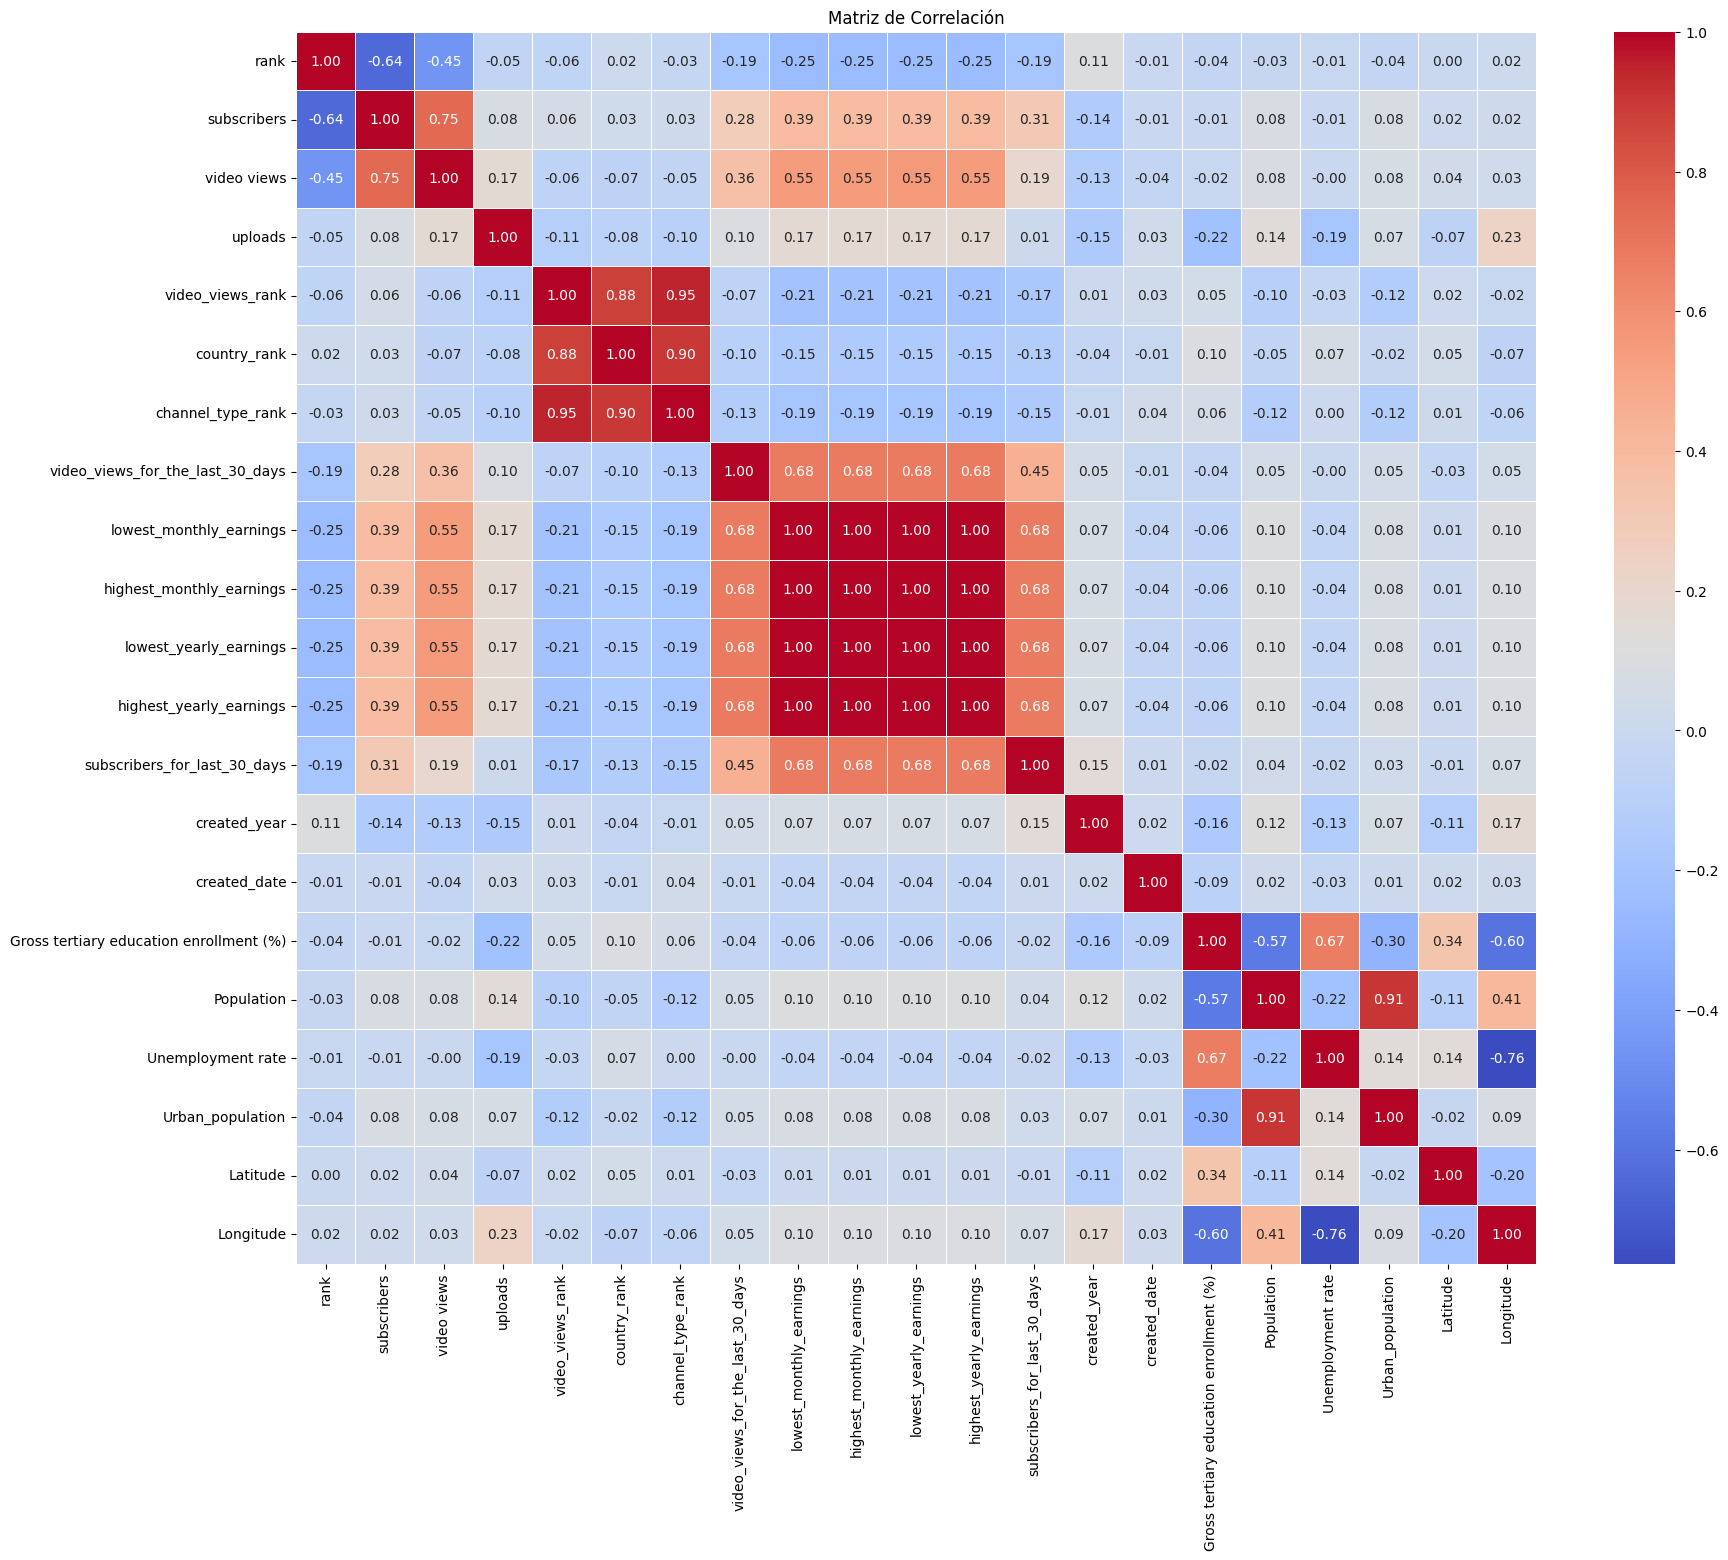

In [6]:
### Análisis de Correlación
# Exclusión de columnas no numéricas
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()

# Configura el estilo de la figura
plt.figure(figsize=(20, 16))

# Crea un mapa de calor con seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añade título
plt.title("Matriz de Correlación")

# Muestra la visualización
plt.show()

In [7]:
sns.pairplot(df_numeric)

Error in callback <function _draw_all_if_interactive at 0x000002029C970D60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002029D1D34C0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

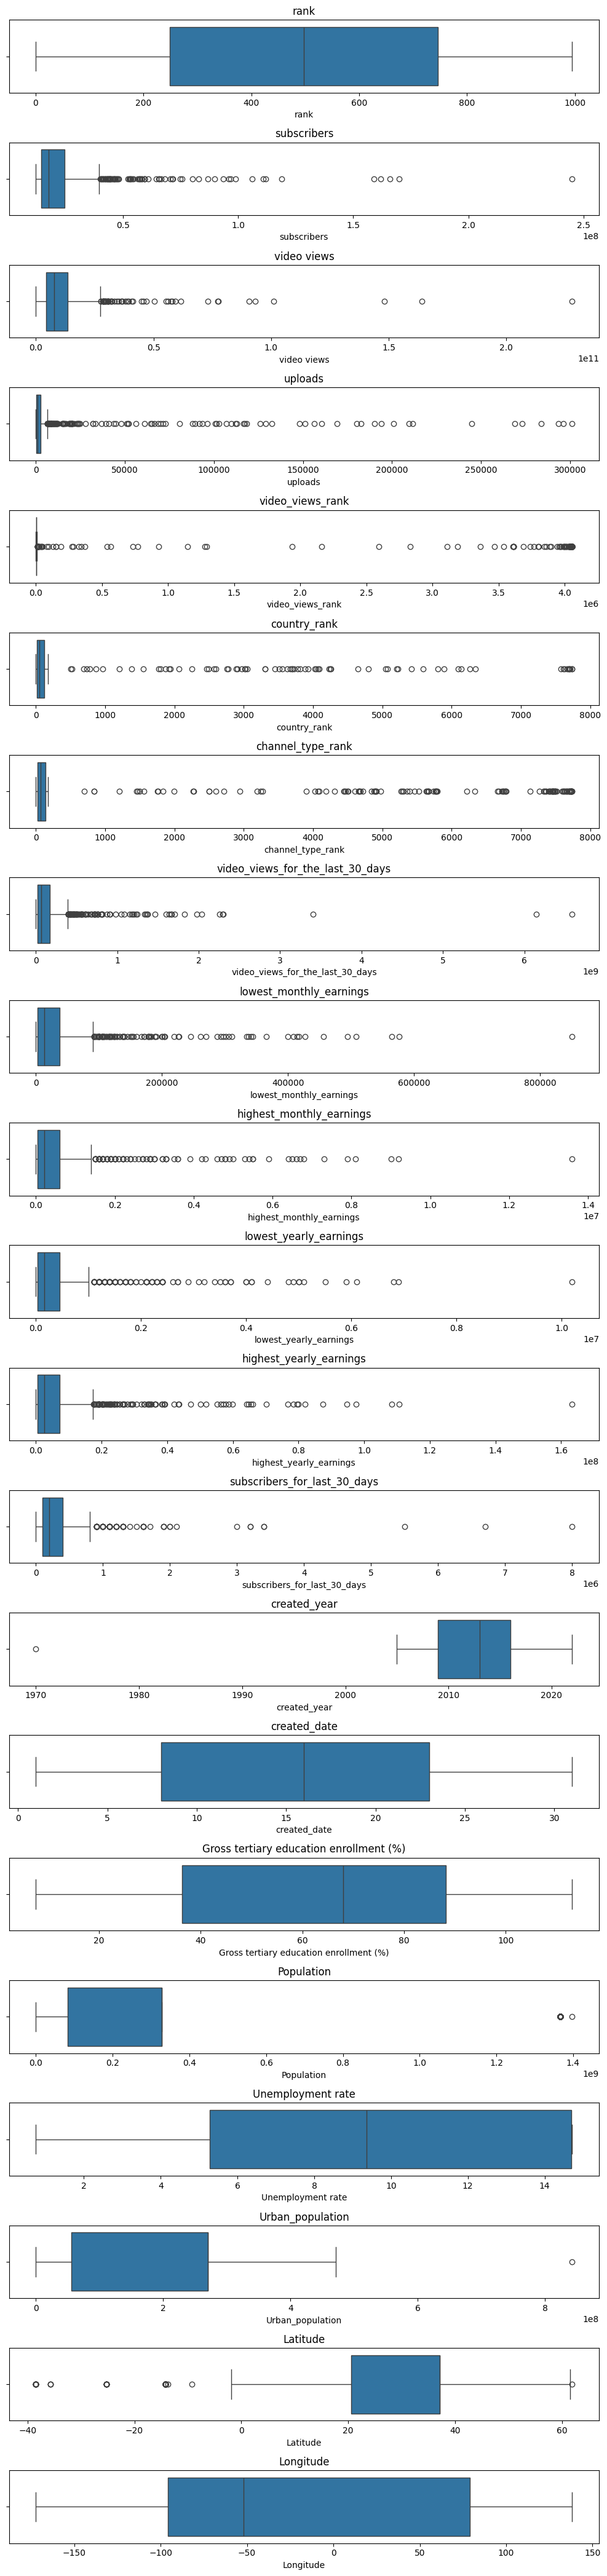

In [8]:
# Supongamos que df es tu DataFrame
num_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()



### 2. Limpieza de Outliers y Tratamiento de datos ausentes

In [9]:
# Lista de columnas con outliers
columns_with_outliers = ['subscribers', 'video views', 'uploads', 'video_views_rank',
                          'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days',
                          'lowest_monthly_earnings', 'highest_monthly_earnings',
                          'lowest_yearly_earnings', 'highest_yearly_earnings',
                          'subscribers_for_last_30_days']

# Definir una función para eliminar outliers basados en el IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Eliminar outliers en las columnas especificadas
for col in columns_with_outliers:
    df = remove_outliers(df, col)

# Ahora df no tiene outliers en las columnas especificadas

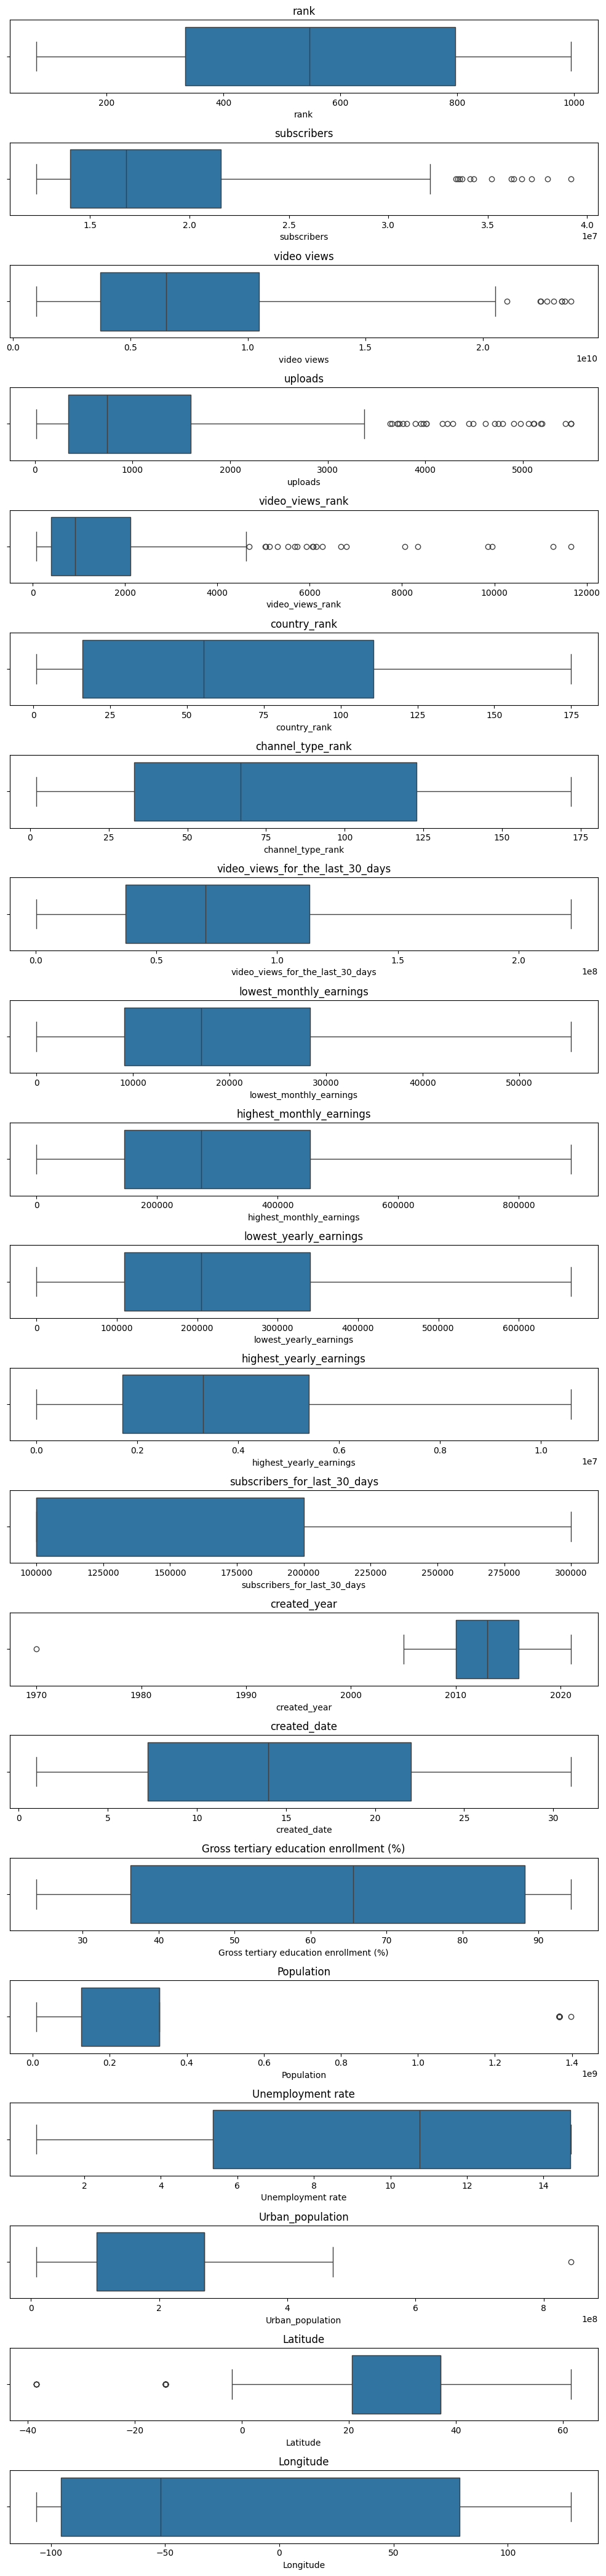

In [10]:
df_numeric = df.select_dtypes(include='number')
# Supongamos que df es tu DataFrame
num_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [11]:
df.shape

(278, 28)

In [12]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,278.000,278.000,278.000,278.000,278.000,278.000,278.000,278.000,278.000,278.000,...,278.000,278.000,278.000,278.000,273.000,273.000,273.000,273.000,273.000,273.000
mean,551.522,18730215.827,7718801274.223,1281.727,1682.820,67.371,76.475,81634740.194,20181.770,322913.309,...,3874890.647,144964.029,2012.824,14.536,63.336,450614393.835,9.665,238022633.363,27.224,-23.578
std,257.722,5984934.813,5241176440.217,1381.697,1957.286,54.526,50.003,54380677.624,13746.015,219933.793,...,2642825.850,67121.035,4.533,8.794,25.231,473525264.804,4.835,152195937.578,19.996,80.290
min,80.000,12300000.000,1001465469.000,15.000,82.000,1.000,2.000,413774.000,0.000,0.000,...,0.000,100000.000,1970.000,1.000,23.900,9770529.000,0.750,8479744.000,-38.416,-106.347
25%,334.750,14000000.000,3711501192.000,339.000,405.250,16.000,33.000,37285000.000,9100.000,145400.000,...,1700000.000,100000.000,2010.000,7.250,36.300,126014024.000,5.360,102626859.000,20.594,-95.713
50%,547.500,16800000.000,6508506816.000,741.500,915.500,55.500,67.000,70343500.000,17050.000,272800.000,...,3300000.000,100000.000,2013.000,14.000,65.600,328239523.000,10.760,270663028.000,37.090,-51.925
75%,796.750,21575000.000,10484225722.750,1598.000,2117.750,110.750,122.750,113511500.000,28375.000,453400.000,...,5400000.000,200000.000,2016.000,22.000,88.200,328239523.000,14.700,270663028.000,37.090,78.963
max,995.000,39200000.000,23755792542.000,5494.000,11662.000,175.000,172.000,221702000.000,55400.000,886800.000,...,10600000.000,300000.000,2021.000,31.000,94.300,1397715000.000,14.720,842933962.000,61.524,127.767


In [13]:
### Identificación de datos ausentes
df.isnull().sum()

rank                                        0
Youtuber                                    0
subscribers                                 0
video views                                 0
category                                   15
Title                                       0
uploads                                     0
Country                                     5
Abbreviation                                5
channel_type                                0
video_views_rank                            0
country_rank                                0
channel_type_rank                           0
video_views_for_the_last_30_days            0
lowest_monthly_earnings                     0
highest_monthly_earnings                    0
lowest_yearly_earnings                      0
highest_yearly_earnings                     0
subscribers_for_last_30_days                0
created_year                                0
created_month                               0
created_date                      

In [14]:
### Eliminar filas con valores nulos
df = df.dropna()

In [13]:
df.shape

(258, 28)

## 3. Creación de Features

### Creación de nueva Feature "years_since_creation": Tiempo transcurrido desde la creación del canal

**Ejemplo Práctico**
Supongamos que tenemos datos sobre la fecha de creación de canales de YouTube. Podemos aplicar Feature Engineering para crear una nueva feature que represente el tiempo transcurrido desde la creación del canal. Esta nueva característica podría capturar tendencias temporales y mejorar la comprensión del modelo sobre la evolución del canal.

In [15]:
# Redondea los valores en la columna 'created_year' y maneja los valores no finitos
df['created_year'] = df['created_year'].apply(lambda x: round(x) if pd.notna(x) and pd.notnull(x) and x != float('inf') and x != float('-inf') else x).astype('Int64')

# Convierte la columna 'created_year' a tipo datetime
df['created_year_date'] = pd.to_datetime(df['created_year'], format='%Y', errors='coerce')

# Calcula el tiempo transcurrido desde la creación en años
current_date = datetime.now()
df['years_since_creation'] = (current_date - df['created_year_date']).dt.days / 365.25


In [16]:
# Configura pandas para que muestre todas las columnas
pd.set_option('display.max_columns', None)

df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,created_year_date,years_since_creation
79,80,XXXTENTACION,39200000,10507474316.000,Music,XXXTENTACION,133,United States,US,Music,403.000,24.000,29.000,58362000.000,14600.000,233400.000,175100.000,2800000.000,100000.000,2015,Jun,23.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,2015-01-01,10.272
90,91,Daddy Yankee,38000000,22731415608.000,Music,Daddy Yankee,505,United States,US,Music,92.000,27.000,33.000,205594000.000,51400.000,822400.000,616800.000,9900000.000,100000.000,2011,May,16.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,2011-01-01,14.272
94,95,Jkk Entertainment,37200000,16402066717.000,Comedy,Jkk Entertainment,220,India,IN,Comedy,178.000,24.000,3.000,49861000.000,12500.000,199400.000,149600.000,2400000.000,100000.000,2017,Mar,20.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963,2017-01-01,8.271
97,98,Bruno Mars,36700000,19378155425.000,Music,Bruno Mars,99,United States,US,Music,134.000,30.000,34.000,175243000.000,43800.000,701000.000,525700.000,8400000.000,200000.000,2006,Sep,19.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,2006-01-01,19.272
101,102,YouTube,36300000,3010784935.000,News & Politics,YouTube,744,United States,US,Entertainment,2860.000,32.000,5.000,21103000.000,5300.000,84400.000,63300.000,1000000.000,300000.000,1970,Jan,1.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,1970-01-01,55.272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,981,Zee Kids,12400000,7683670251.000,Film & Animation,Zee Kids,1212,India,IN,Entertainment,709.000,124.000,172.000,95163000.000,23800.000,380700.000,285500.000,4600000.000,100000.000,2012,Jul,6.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963,2012-01-01,13.273
984,985,bharatzkitchen HINDI,12400000,2315226648.000,Howto & Style,bharatzkitchen HINDI,729,India,IN,Howto,4042.000,124.000,38.000,30968000.000,7700.000,123900.000,92900.000,1500000.000,100000.000,2016,Aug,10.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963,2016-01-01,9.273
989,990,Migos ATL,12400000,6993406259.000,Music,Migos ATL,99,United States,US,Entertainment,833.000,175.000,171.000,49412000.000,12400.000,197600.000,148200.000,2400000.000,100000.000,2012,Jan,17.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,2012-01-01,13.273
991,992,Free Fire India Official,12300000,1674409945.000,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.000,125.000,69.000,64735000.000,16200.000,258900.000,194200.000,3100000.000,300000.000,2018,Sep,14.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963,2018-01-01,7.272


### 4. Manejo de Datos Categóricos
### ¿Cómo hace la máquina para leer valores categóricos, es decir, texto de categorías? Solución: One-Hot Encoding

In [18]:
# Aplicar One-Hot Encoding a la variable 'channel_type'
df = pd.get_dummies(df, columns=['category'], dtype=int)

In [19]:
df

,rank,Youtuber,subscribers,video views,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,created_year_date,years_since_creation,category_Autos & Vehicles,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Movies,category_Music,category_News & Politics,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports
79,80,XXXTENTACION,39200000,10507474316.000,XXXTENTACION,133,United States,US,Music,403.000,24.000,29.000,58362000.000,14600.000,233400.000,175100.000,2800000.000,100000.000,2015,Jun,23.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,2015-01-01,10.272,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
90,91,Daddy Yankee,38000000,22731415608.000,Daddy Yankee,505,United States,US,Music,92.000,27.000,33.000,205594000.000,51400.000,822400.000,616800.000,9900000.000,100000.000,2011,May,16.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,2011-01-01,14.272,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
94,95,Jkk Entertainment,37200000,16402066717.000,Jkk Entertainment,220,India,IN,Comedy,178.000,24.000,3.000,49861000.000,12500.000,199400.000,149600.000,2400000.000,100000.000,2017,Mar,20.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963,2017-01-01,8.271,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
97,98,Bruno Mars,36700000,19378155425.000,Bruno Mars,99,United States,US,Music,134.000,30.000,34.000,175243000.000,43800.000,701000.000,525700.000,8400000.000,200000.000,2006,Sep,19.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,2006-01-01,19.272,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
101,102,YouTube,36300000,3010784935.000,YouTube,744,United States,US,Entertainment,2860.000,32.000,5.000,21103000.000,5300.000,84400.000,63300.000,1000000.000,300000.000,1970,Jan,1.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,1970-01-01,55.272,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,981,Zee Kids,12400000,7683670251.000,Zee Kids,1212,India,IN,Entertainment,709.000,124.000,172.000,95163000.000,23800.000,380700.000,285500.000,4600000.000,100000.000,2012,Jul,6.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963,2012-01-01,13.273,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
984,985,bharatzkitchen HINDI,12400000,2315226648.000,bharatzkitchen HINDI,729,India,IN,Howto,4042.000,124.000,38.000,30968000.000,7700.000,123900.000,92900.000,1500000.000,100000.000,2016,Aug,10.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963,2016-01-01,9.273,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
989,990,Migos ATL,12400000,6993406259.000,Migos ATL,99,United States,US,Entertainment,833.000,175.000,171.000,49412000.000,12400.000,197600.000,148200.000,2400000.000,100000.000,2012,Jan,17.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,2012-01-01,13.273,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
991,992,Free Fire India Official,12300000,1674409945.000,Free Fire India Official,1500,India,IN,Games,6141.000,125.000,69.000,64735000.000,16200.000,258900.000,194200.000,3100000.000,300000.000,2018,Sep,14.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963,2018-01-01,7.272,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [20]:
#Exporto el DataFrame para poder usarlo en Machine Learning

df.to_csv('YoutTubeParaML.csv', index=False)

### En el siguiente episodio vamos a estar trabajando, en cómo utilizar todos estos resultados que obtuvimos a partir del Feature Engineering como INPUT para nuestro modelo de Machine Learning que nos va a ayudar a predecir los ingresos de los YouTubers a partir de determinadas Features.